In [1]:
## import some modules between which also our HamFit_py

import HammerFit
from iminuit import Minuit
import numpy as np

/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:257:29: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "memory_resource" [optional] {
                            ^
/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:447:27: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/chrono.h" [optional] {
                          ^
/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:531:41: warning: unknown attribute 'optional' [-Wignored-attributes]
  explicit module "bits_ranges_base_h" [optional] {
                                        ^
/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:538:32: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/ranges_util.h" [optional] {
                               ^
/home/mcolonna/.conda/envs/env_2024_11_25/etc/cling/std.modulemap:559:40: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/uses

Welcome to JupyROOT 6.28/04


In [2]:
# here we make use of the Reader class
# that makes use of the classes in the module and gives you a fitter object
# that you can than use to interface any kind of fitting interface

reader = HammerFit.Reader("Config_yield_fit.json")
fitter = reader.createFitter()

/home/mcolonna/.conda/envs/env_2024_11_25/lib/python3.10/site-packages/HammerFit/HammerFit.py:612: RuntimeWarning: invalid value encountered in divide
  ratio = contributions[0][i] / total_contribution
/home/mcolonna/.conda/envs/env_2024_11_25/lib/python3.10/site-packages/HammerFit/HammerFit.py:613: RuntimeWarning: invalid value encountered in divide
  ratio_err = np.sqrt(contributions[0][i]) / total_contribution


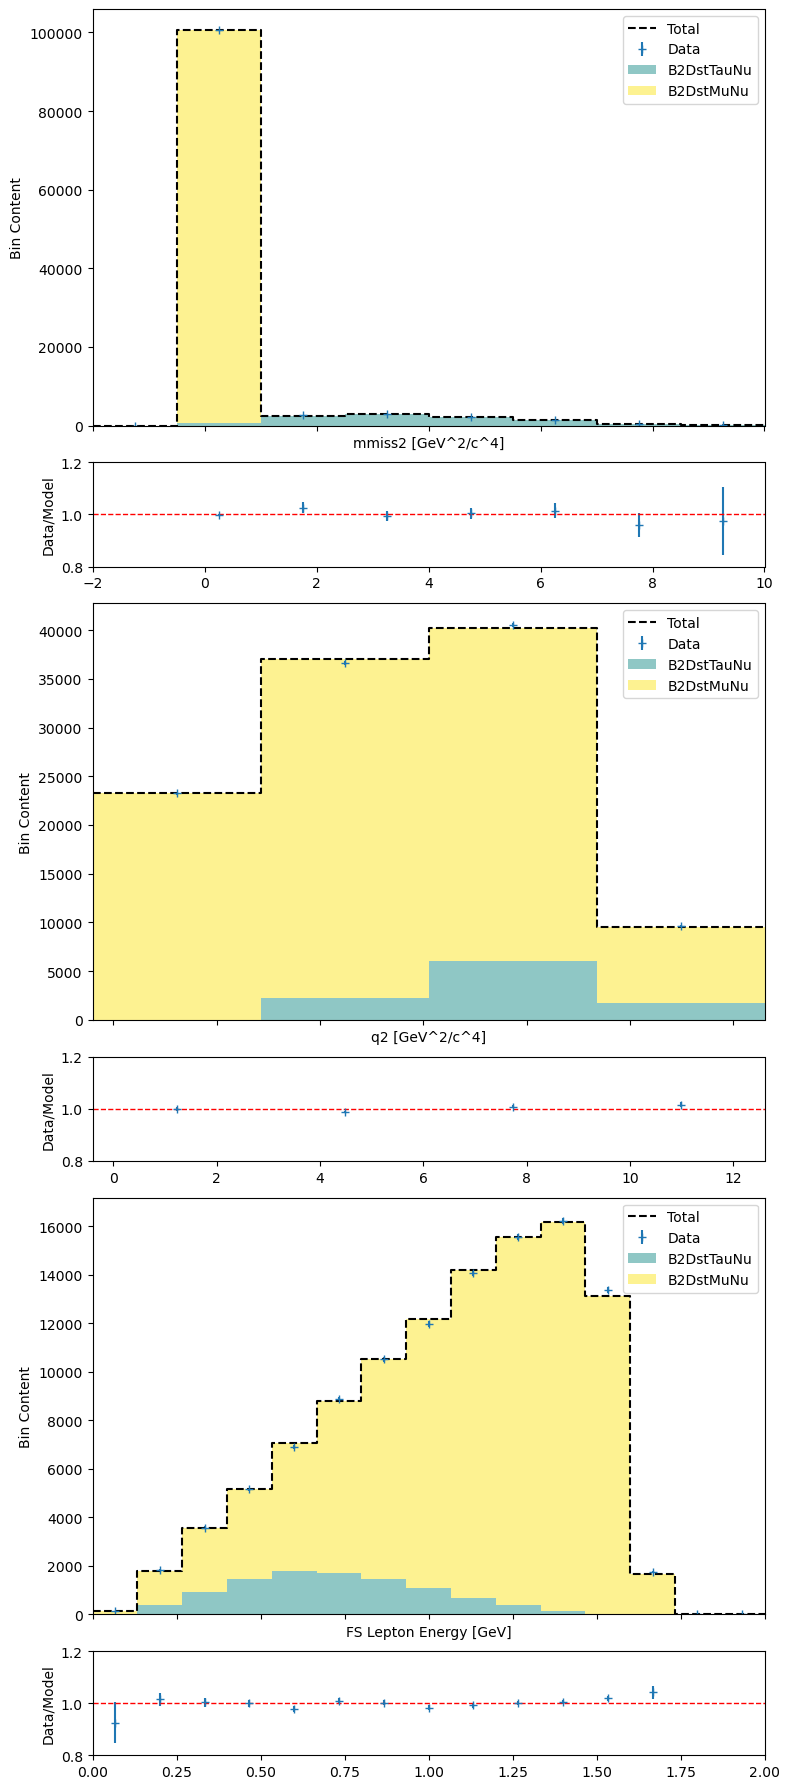

In [3]:
# from the fitter object you can change the parameters and see how it change
# the plot method compares the template with a toy that is produced according to the parameters in the .config file

params = {"SM" : 1., "Re_S_qLlL" : -0., "Im_S_qLlL" : 0. , "Re_S_qRlL" : 0., "Im_S_qRlL" : 0.,  "Re_V_qLlL" : 0., "Im_V_qLlL" : 0. , "Re_V_qRlL" : 0., "Im_V_qRlL" : 0., "Re_T_qLlL" : 0.0, "Im_T_qLlL" : +0., "delta_RhoSq" : 0.0, "delta_cSt" : 0.0, "delta_chi21" : 0., "delta_chi2p" : 0., "delta_chi3p" : 0., "delta_eta1" : 0., "delta_etap" : 0., "delta_phi1p" : 0., "delta_beta21" : 0., "delta_beta3p" : 0.,"Yield_control" : 100000.,"Yield_signal" : 10000.}
fitter.upload_data_toy(**params)
fitter.plot(**params)

In [4]:
## here we fit the yield of 2 contributions
## when doing this we HAVE TO fix the WCs and the FFs otherwise these will introduce degenerancy with the yields
## that are defined in the json as Nuisance parameters (and the scale factor is set to 1 for this reason)

def fit_Yield(fitter,**initial_guess):
    def nll_wrapped(SM, Re_S_qLlL, Im_S_qLlL, Re_S_qRlL, Im_S_qRlL, Re_V_qLlL, Im_V_qLlL, Re_V_qRlL, Im_V_qRlL, Re_T_qLlL, Im_T_qLlL, delta_RhoSq,delta_cSt,delta_chi21,delta_chi2p,delta_chi3p,delta_eta1,delta_etap,delta_phi1p,delta_beta21,delta_beta3p,Yield_control,Yield_signal):
        return fitter.negative_log_likelihood(SM=SM, Re_S_qLlL=Re_S_qLlL, Im_S_qLlL=Im_S_qLlL, Re_S_qRlL=Re_S_qRlL, Im_S_qRlL=Im_S_qRlL, Re_V_qLlL=Re_V_qLlL, Im_V_qLlL=Im_V_qLlL, Re_V_qRlL=Re_V_qRlL, Im_V_qRlL=Im_V_qRlL, Re_T_qLlL=Re_T_qLlL, Im_T_qLlL=Im_T_qLlL,delta_RhoSq=delta_RhoSq,delta_cSt=delta_cSt,delta_chi21=delta_chi21,delta_chi2p=delta_chi2p,delta_chi3p=delta_chi3p,delta_eta1=delta_eta1,delta_etap=delta_etap,delta_phi1p=delta_phi1p,delta_beta21=delta_beta21,delta_beta3p=delta_beta3p,Yield_control=Yield_control,Yield_signal=Yield_signal)
    m = Minuit(nll_wrapped, **initial_guess)

    m.limits['SM'] = (1,1)

    m.limits['Re_S_qLlL'] = (0.,0.)
    m.limits['Re_S_qRlL'] = (0.,0.)
    m.limits['Re_V_qLlL'] = (0.,0.)
    m.limits['Re_V_qRlL'] = (0.,0.)
    m.limits['Re_T_qLlL'] = (0.,0.)
    m.limits['Im_S_qLlL'] = (0.,0.)
    m.limits['Im_S_qRlL'] = (0.,0.)
    m.limits['Im_V_qLlL'] = (0.,0.)
    m.limits['Im_V_qRlL'] = (0.,0.)
    m.limits['Im_T_qLlL'] = (0.,0.)

    m.limits['delta_RhoSq'] = (0.,0.) 
    m.limits['delta_cSt'] = (0.,0.) 
    m.limits['delta_chi21'] = (0.,0.) 
    m.limits['delta_chi2p'] = (0.,0.) 
    m.limits['delta_chi3p'] = (0.,0.) 
    m.limits['delta_eta1'] = (0.,0.) 
    m.limits['delta_etap'] = (0.,0.) 
    m.limits['delta_phi1p'] = (0.,0.) 
    m.limits['delta_beta21'] = (0.,0.) 
    m.limits['delta_beta3p'] = (0.,0.) 

    m.limits['Yield_signal'] = (0.,1000000.)
    m.limits['Yield_control'] = (0.,1000000.)
    m.migrad()
    m.errordef = Minuit.LIKELIHOOD
    values = []
    errors = []
    for param in m.parameters:
            value = m.values[param]
            values.append(value)
            error = m.errors[param]
            errors.append(error)
            print(f"{param}: {value:.4f} ± {error:.4f}")
    return m.fval, m.values, m.errors


In [5]:
initial_guess={"SM" : 1., "Re_S_qLlL" : -0., "Im_S_qLlL" : 0. , "Re_S_qRlL" : 0., "Im_S_qRlL" : 0.,  "Re_V_qLlL" : 0., "Im_V_qLlL" : 0. , "Re_V_qRlL" : 0., "Im_V_qRlL" : 0., "Re_T_qLlL" : 0.0, "Im_T_qLlL" : +0., "delta_RhoSq" : 0.0, "delta_cSt" : 0.0, "delta_chi21" : 0., "delta_chi2p" : 0., "delta_chi3p" : 0., "delta_eta1" : 0., "delta_etap" : 0., "delta_phi1p" : 0., "delta_beta21" : 0., "delta_beta3p" : 0.,"Yield_control" : 100000.,"Yield_signal" : 10000.}
%time minnll, vals, errs = fit_Yield(fitter,**initial_guess)

SM: 1.0000 ± 0.0100
Re_S_qLlL: -0.0000 ± 0.1000
Im_S_qLlL: 0.0000 ± 0.1000
Re_S_qRlL: 0.0000 ± 0.1000
Im_S_qRlL: 0.0000 ± 0.1000
Re_V_qLlL: 0.0000 ± 0.1000
Im_V_qLlL: 0.0000 ± 0.1000
Re_V_qRlL: 0.0000 ± 0.1000
Im_V_qRlL: 0.0000 ± 0.1000
Re_T_qLlL: 0.0000 ± 0.1000
Im_T_qLlL: 0.0000 ± 0.1000
delta_RhoSq: 0.0000 ± 0.1000
delta_cSt: 0.0000 ± 0.1000
delta_chi21: 0.0000 ± 0.1000
delta_chi2p: 0.0000 ± 0.1000
delta_chi3p: 0.0000 ± 0.1000
delta_eta1: 0.0000 ± 0.1000
delta_etap: 0.0000 ± 0.1000
delta_phi1p: 0.0000 ± 0.1000
delta_beta21: 0.0000 ± 0.1000
delta_beta3p: 0.0000 ± 0.1000
Yield_control: 99968.5756 ± 316.9610
Yield_signal: 10051.6994 ± 102.6935
CPU times: user 131 ms, sys: 2.65 ms, total: 134 ms
Wall time: 134 ms
